In [17]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd



In [18]:
# Montar drive
drive.mount("/content/gdrive", force_remount=True)
df = pd.DataFrame(pd.read_excel("/content/gdrive/MyDrive/output_def.xlsx"))


Mounted at /content/gdrive


grade         1    2   3
neoadjuvant             
0            44  136  18
1             2   34  13


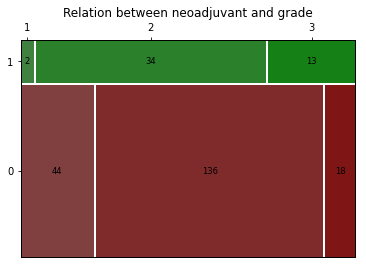

In [88]:
from statsmodels.graphics.mosaicplot import mosaic

# Labelizer contiene el numero de datos que contiene ambas etiquetas (Se ve en crosstable)
def categorical_relation(var1,var2,labelizer):
  crosstable=pd.crosstab(df[var1],df[var2])
  print(crosstable)
  labelizer= labelizer
  mosaic(df,[var1,var2],gap=0.01, title='Relation between ' + var1 + ' and ' + var2,horizontal = False,labelizer = labelizer)

categorical_relation('neoadjuvant','grade',lambda k:{('0','1'):44  ,('0','2'):136  ,('0','3'):18,('1','1'):2,('1','2'):34,('1','3'):13}[k])

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


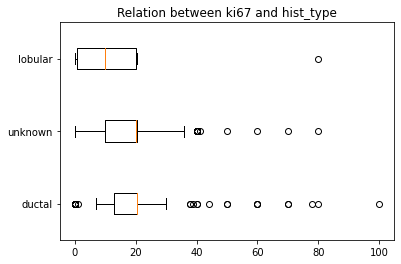

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


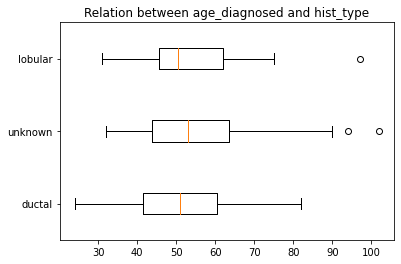

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


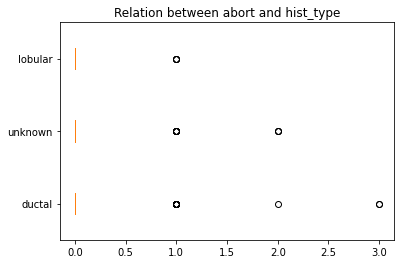

In [78]:
def boxplot(categorical, numerical):
  data = []
  for type in (df[categorical]).unique():
    aux = []
    for i in range(len(df['ehr'])):
      if df[categorical][i] == type:
        aux.append(df[numerical][i])
    data.append(aux)

  plt.boxplot(data, vert = False, labels = df[categorical].unique())
  plt.title("Relation between " + numerical +" and "+ categorical)
  plt.show()

boxplot('hist_type','ki67')
boxplot('hist_type','age_diagnosed')
boxplot('hist_type','abort')




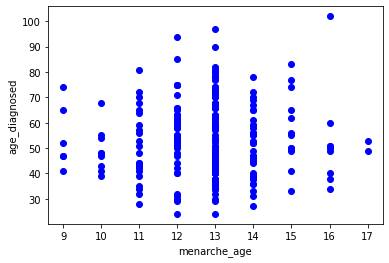

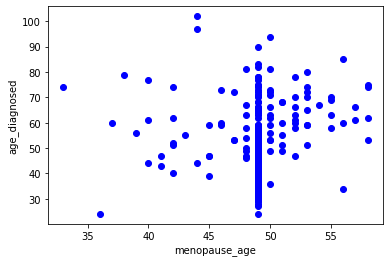

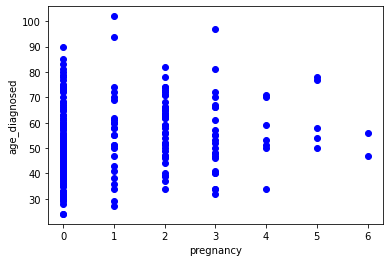

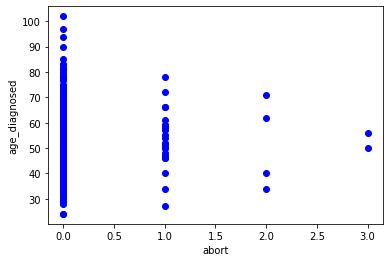

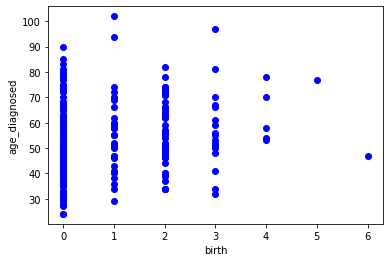

In [75]:
def numerical_relation(var1,var2):
  data1 = df[var1]
  data2 = df[var2]
  plt.plot(data1,data2,"bo")
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

# Relation between age of diagnose and other variables
numerical_relation('menarche_age','age_diagnosed')
numerical_relation('menopause_age','age_diagnosed')
numerical_relation('pregnancy','age_diagnosed')
numerical_relation('abort','age_diagnosed')
numerical_relation('birth','age_diagnosed')